In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colormaps
import matplotlib.cm as cm
import matplotlib.colors as mcolors

import xtrack as xt
import xpart as xp
import xobjects as xo
import xcoll as xc

# Linear line

## With sextupoles

In [2]:
line = xt.Line.from_json('../../injection_lines/sps_q20_inj.json')
tt = line.get_table()
tw = line.twiss()
env = line.env
cavity_elements, cavity_names = line.get_elements_of_type(xt.Cavity)

for name in cavity_names:
    line[name].frequency = 200e6
    line[name].lag = 180
line['acl.31735'].voltage = 0 #setting 800 cav to 0V
line['actcse.31632'].voltage = 3.0e6

Loading line from dict:   0%|          | 0/4037 [00:00<?, ?it/s]

Done loading line from dict.           


In [3]:
qx = 20.13
qy = 20.18
chroma_norm = 0.5

dqx_calc = chroma_norm*qx
dqy_calc = chroma_norm*qy
opt = line.match(
    method='6d', # <- passed to twiss
    vary=[
        xt.VaryList(['kqf0', 'kqd0'], step=1e-8, tag='quad'),
        xt.VaryList(['qph_setvalue', 'qpv_setvalue'], step=1e-4, tag='sext'),
    ],
    targets = [
        xt.TargetSet(qx=qx, qy=qy, tol=1e-6, tag='tune'),
        xt.TargetSet(dqx=dqx_calc, dqy=dqy_calc, tol=1e-2, tag='chrom'),
    ])

                                             
Optimize - start penalty: 1.178                             
Matching: model call n. 7 penalty = 3.4867e-04              
Optimize - end penalty:  0.000348674                            


In [4]:
bpms_hor = ['bph.10208', 'bph.10408', 'bph.10608', 'bph.10808', 
            'bph.11008', 'bph.11208', 'bph.11408', 'bph.11608', 'bph.11831', 
            'bph.12008', 'bph.12208', 'bph.12408', 'bph.12608', 'bph.12808', 
            'bph.13008', 'bph.13208', 'bph.13408', 'bph.13608', 
            'bph.20208', 'bph.20408', 'bph.20608', 'bph.20808', 
            'bph.21008', 'bph.21208', 'bph.21408', 
            'bph.22008', 'bph.22208', 'bph.22408', 'bph.22608', 'bph.22808', 
            'bph.23008', 'bph.23208', 'bph.23408', 'bph.23608', 
            'bph.30208', 'bph.30408', 'bph.30608', 'bph.30808', 
            'bph.31008', 'bph.31208', 'bph.31408', 'bph.31608', 'bph.31808', 
            'bph.32008', 'bph.32208', 'bph.32408', 'bph.32608', 'bph.32808', 
            'bph.33008', 'bph.33208', 'bph.33408', 'bph.33608', 
            'bph.40208', 'bph.40408', 'bph.40608', 'bph.40808', 
            'bph.41008', 'bph.41208', 'bph.41408', 'bph.41607', #Mistake in bpm name (lsa name is bph.41608, not 7)
            'bph.42008', 'bph.42208', 'bph.42408', 'bph.42608', 'bph.42808', 
            'bph.43008', 'bph.43208', 'bph.43408', 'bph.43608', 
            'bph.50208', 'bph.50408', 'bph.50608', 'bph.50808', 
            'bph.51008', 'bph.51208', 'bph.51408', 
            'bph.52008', 'bph.52208', 'bph.52408', 'bph.52608', 'bph.52808', 
            'bph.53008', 'bph.53208', 'bph.53408', 'bph.53608', 
            'bph.60208', 'bph.60408', 'bph.60608', 'bph.60808', 
            'bph.61008', 'bph.61208', 'bph.61408', 'bph.61608', 
            'bph.62008', 'bph.62208', 'bph.62408', 'bph.62608', 'bph.62808', 
            'bph.63008', 'bph.63208', 'bph.63408', 'bph.63608']

In [5]:
delta_sampling = np.linspace(0, 0.01, 1000)

In [6]:
twisses_4d_pos = []
twisses_4d_neg = []

for i in range(len(delta_sampling)):
    if i % 100 == 0:
        print(f'Calculating twiss for delta {i}/{len(delta_sampling)}')
    twisses_4d_pos.append(line.twiss(delta0=delta_sampling[i], method='4d'))
    twisses_4d_neg.append(line.twiss(delta0=-delta_sampling[i], method='4d'))

Calculating twiss for delta 0/1000
Calculating twiss for delta 100/1000
Calculating twiss for delta 200/1000
Calculating twiss for delta 300/1000
Calculating twiss for delta 400/1000
Calculating twiss for delta 500/1000
Calculating twiss for delta 600/1000
Calculating twiss for delta 700/1000
Calculating twiss for delta 800/1000
Calculating twiss for delta 900/1000


In [7]:
tw = line.twiss()
print(tw.qx, tw.qy)
print(tw.dqx, tw.dqy)

20.129999999366945 20.180000000128576
10.065348638929917 10.089995057231324


### bph.10208

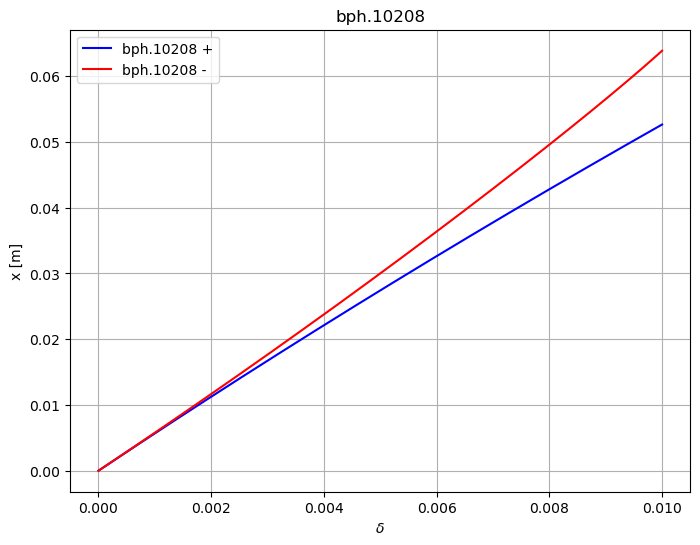

In [8]:
fig, ax = plt.subplots(1,1, figsize=(8,6))
colormap = colormaps['viridis']
norm = plt.Normalize(vmin=0, vmax= len(delta_sampling))

bpm = bpms_hor[0]
x4d_pos = np.array([twisses_4d_pos[i].rows[bpm].x[0] for i in range(len(delta_sampling))])
x4d_neg = np.array([twisses_4d_neg[i].rows[bpm].x[0] for i in range(len(delta_sampling))])

ax.plot(delta_sampling, x4d_pos, label=f'{bpm} +', color='blue')
ax.plot(delta_sampling, -x4d_neg, label=f'{bpm} -', color='red')
ax.set_xlabel('$\\delta$')
ax.set_ylabel('x [m]')
ax.set_title(f'{bpm}')
ax.legend()
ax.grid()

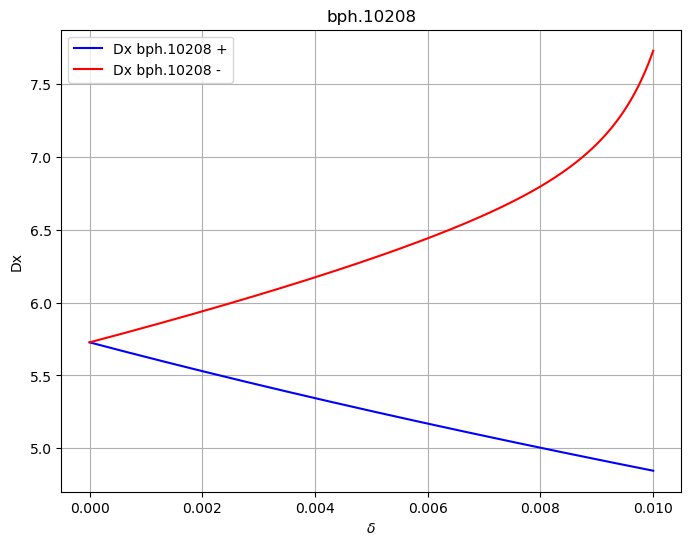

In [9]:
#Dx ook speigelen
fig, ax = plt.subplots(1,1, figsize=(8,6))

bpm = bpms_hor[0]
Dx4d_pos = np.array([twisses_4d_pos[i].rows[bpm].dx[0] for i in range(len(delta_sampling))])
Dx4d_neg = np.array([twisses_4d_neg[i].rows[bpm].dx[0] for i in range(len(delta_sampling))])
DDx4d_pos = np.array([twisses_4d_pos[i].rows[bpm].ddx[0] for i in range(len(delta_sampling))])
DDx4d_neg = np.array([twisses_4d_neg[i].rows[bpm].ddx[0] for i in range(len(delta_sampling))])

ax.plot(delta_sampling, Dx4d_pos, label=f'Dx {bpm} +', color='blue')
ax.plot(delta_sampling, Dx4d_neg, label=f'Dx {bpm} -', color='red')
# ax.plot(delta_sampling, DDx4d_pos, label=f'DDx2 {bpm} +', color='cyan')
# ax.plot(delta_sampling, -DDx4d_neg, label=f'DDx2 {bpm} -', color='magenta')

ax.set_xlabel('$\\delta$')
ax.set_ylabel('Dx')
ax.set_title(f'{bpm}')
ax.legend()
ax.grid()

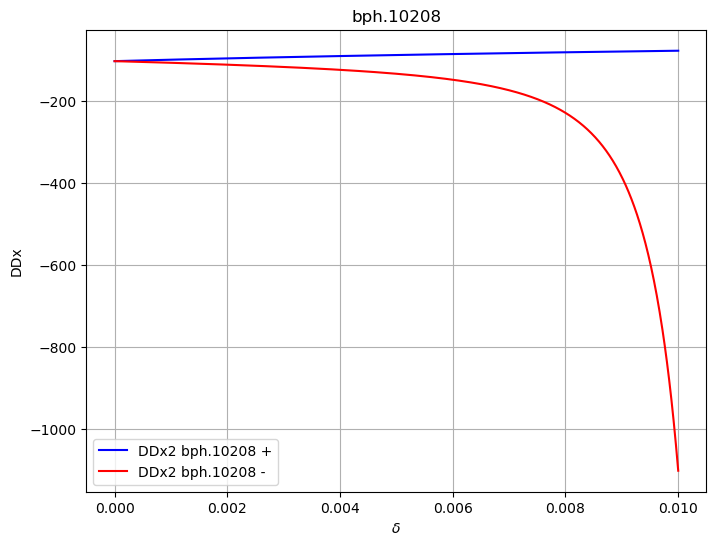

In [10]:
fig, ax = plt.subplots(1,1, figsize=(8,6))

bpm = bpms_hor[0]
Dx4d_pos = np.array([twisses_4d_pos[i].rows[bpm].dx[0] for i in range(len(delta_sampling))])
Dx4d_neg = np.array([twisses_4d_neg[i].rows[bpm].dx[0] for i in range(len(delta_sampling))])
DDx4d_pos = np.array([twisses_4d_pos[i].rows[bpm].ddx[0] for i in range(len(delta_sampling))])
DDx4d_neg = np.array([twisses_4d_neg[i].rows[bpm].ddx[0] for i in range(len(delta_sampling))])

# ax.plot(delta_sampling, Dx4d_pos, label=f'Dx {bpm} +', color='blue')
# ax.plot(delta_sampling, Dx4d_neg, label=f'Dx {bpm} -', color='red')
ax.plot(delta_sampling, DDx4d_pos, label=f'DDx2 {bpm} +', color='blue')
ax.plot(delta_sampling, DDx4d_neg, label=f'DDx2 {bpm} -', color='red')

ax.set_xlabel('$\\delta$')
ax.set_ylabel('DDx')
ax.set_title(f'{bpm}')
ax.legend()
ax.grid()

In [11]:
tw.rows['qd.20110<<30':'qd.20110>>10'].show()

name                   s             x            px             y            py          zeta ...
mba.13570        1136.65  -8.57716e-14  -2.70956e-15             0             0  -4.71351e-12
drift_308        1142.91  -1.02991e-13  -2.79467e-15             0             0  -4.75142e-12
mba.13590        1143.31  -1.04109e-13  -2.79467e-15             0             0  -4.75142e-12
drift_309        1149.57  -1.21858e-13  -2.87847e-15             0             0  -4.78934e-12
loe.13602        1149.89  -1.22777e-13  -2.87847e-15             0             0  -4.78934e-12
drift_310        1150.63  -1.24907e-13  -2.87847e-15             0             0  -4.78934e-12
lsf.13605        1150.71   -1.2514e-13  -2.87847e-15             0             0  -4.78934e-12
drift_311        1151.14  -1.26392e-13  -2.87847e-15             0             0  -4.78934e-12
mdh.13607        1151.28  -1.26774e-13  -2.87847e-15             0             0  -4.78934e-12
drift_312        1151.53  -1.27493e-13  -2.878

### bph.13608

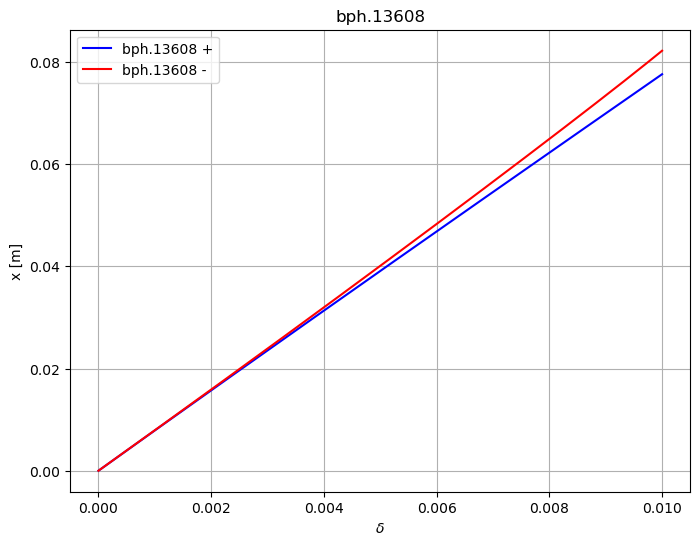

In [12]:
fig, ax = plt.subplots(1,1, figsize=(8,6))
colormap = colormaps['viridis']
norm = plt.Normalize(vmin=0, vmax= len(delta_sampling))

bpm = 'bph.13608'
x4d_pos = np.array([twisses_4d_pos[i].rows[bpm].x[0] for i in range(len(delta_sampling))])
x4d_neg = np.array([twisses_4d_neg[i].rows[bpm].x[0] for i in range(len(delta_sampling))])

ax.plot(delta_sampling, x4d_pos, label=f'{bpm} +', color='blue')
ax.plot(delta_sampling, -x4d_neg, label=f'{bpm} -', color='red')
ax.set_xlabel('$\\delta$')
ax.set_ylabel('x [m]')
ax.set_title(f'{bpm}')
ax.legend()
ax.grid()

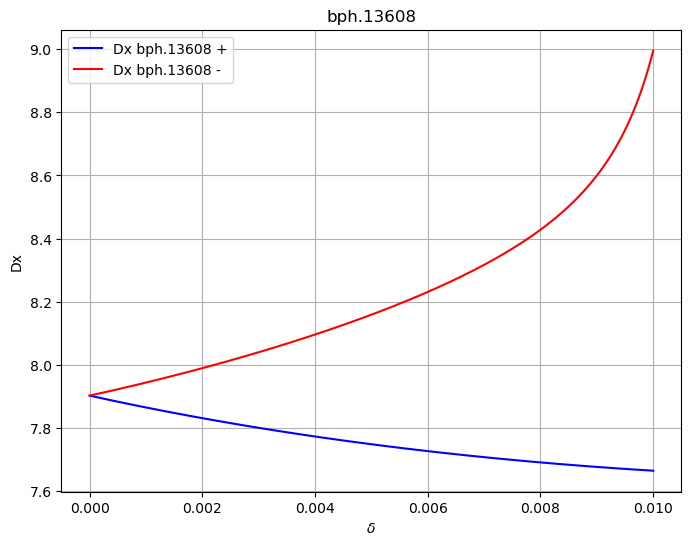

In [13]:
#Dx ook speigelen
fig, ax = plt.subplots(1,1, figsize=(8,6))

bpm = 'bph.13608'
Dx4d_pos = np.array([twisses_4d_pos[i].rows[bpm].dx[0] for i in range(len(delta_sampling))])
Dx4d_neg = np.array([twisses_4d_neg[i].rows[bpm].dx[0] for i in range(len(delta_sampling))])
DDx4d_pos = np.array([twisses_4d_pos[i].rows[bpm].ddx[0] for i in range(len(delta_sampling))])
DDx4d_neg = np.array([twisses_4d_neg[i].rows[bpm].ddx[0] for i in range(len(delta_sampling))])

ax.plot(delta_sampling, Dx4d_pos, label=f'Dx {bpm} +', color='blue')
ax.plot(delta_sampling, Dx4d_neg, label=f'Dx {bpm} -', color='red')
# ax.plot(delta_sampling, DDx4d_pos, label=f'DDx2 {bpm} +', color='cyan')
# ax.plot(delta_sampling, -DDx4d_neg, label=f'DDx2 {bpm} -', color='magenta')

ax.set_xlabel('$\\delta$')
ax.set_ylabel('Dx')
ax.set_title(f'{bpm}')
ax.legend()
ax.grid()

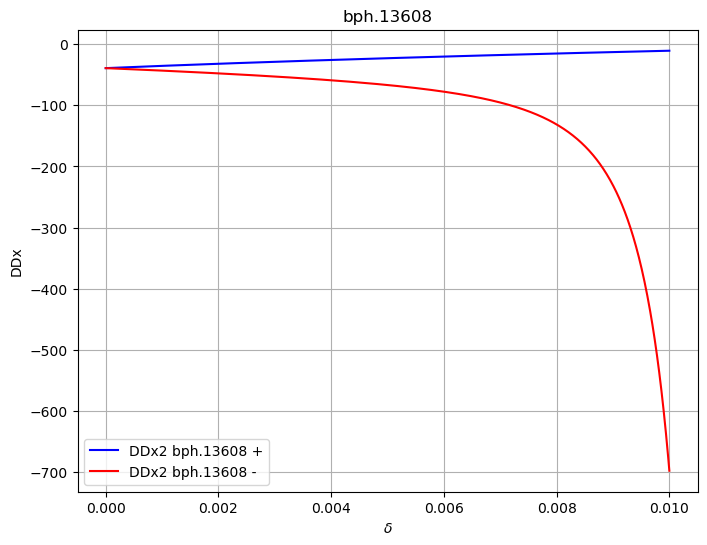

In [14]:
fig, ax = plt.subplots(1,1, figsize=(8,6))

bpm = 'bph.13608'
Dx4d_pos = np.array([twisses_4d_pos[i].rows[bpm].dx[0] for i in range(len(delta_sampling))])
Dx4d_neg = np.array([twisses_4d_neg[i].rows[bpm].dx[0] for i in range(len(delta_sampling))])
DDx4d_pos = np.array([twisses_4d_pos[i].rows[bpm].ddx[0] for i in range(len(delta_sampling))])
DDx4d_neg = np.array([twisses_4d_neg[i].rows[bpm].ddx[0] for i in range(len(delta_sampling))])

# ax.plot(delta_sampling, Dx4d_pos, label=f'Dx {bpm} +', color='blue')
# ax.plot(delta_sampling, Dx4d_neg, label=f'Dx {bpm} -', color='red')
ax.plot(delta_sampling, DDx4d_pos, label=f'DDx2 {bpm} +', color='blue')
ax.plot(delta_sampling, DDx4d_neg, label=f'DDx2 {bpm} -', color='red')

ax.set_xlabel('$\\delta$')
ax.set_ylabel('DDx')
ax.set_title(f'{bpm}')
ax.legend()
ax.grid()

### bph.20203

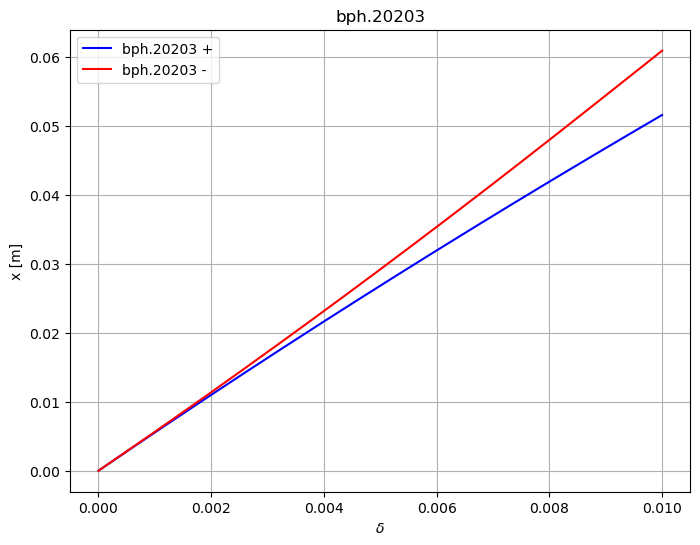

In [15]:
fig, ax = plt.subplots(1,1, figsize=(8,6))
colormap = colormaps['viridis']
norm = plt.Normalize(vmin=0, vmax= len(delta_sampling))

bpm = 'bph.20203'
x4d_pos = np.array([twisses_4d_pos[i].rows[bpm].x[0] for i in range(len(delta_sampling))])
x4d_neg = np.array([twisses_4d_neg[i].rows[bpm].x[0] for i in range(len(delta_sampling))])

ax.plot(delta_sampling, x4d_pos, label=f'{bpm} +', color='blue')
ax.plot(delta_sampling, -x4d_neg, label=f'{bpm} -', color='red')
ax.set_xlabel('$\\delta$')
ax.set_ylabel('x [m]')
ax.set_title(f'{bpm}')
ax.legend()
ax.grid()

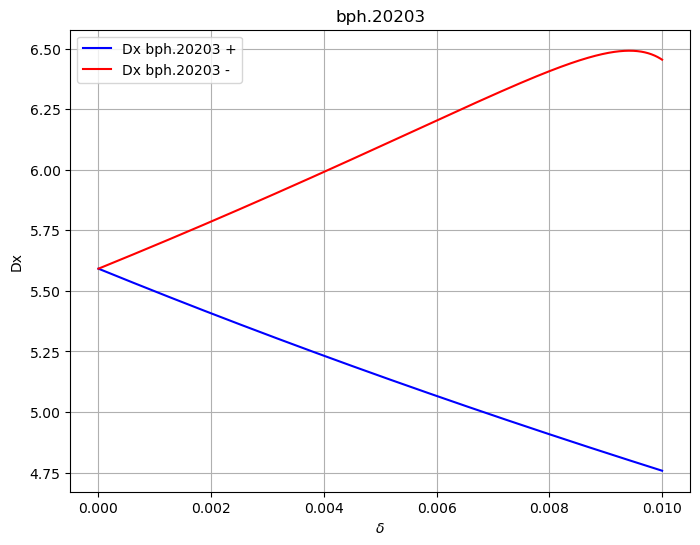

In [16]:
#Dx ook speigelen
fig, ax = plt.subplots(1,1, figsize=(8,6))

bpm = 'bph.20203'
Dx4d_pos = np.array([twisses_4d_pos[i].rows[bpm].dx[0] for i in range(len(delta_sampling))])
Dx4d_neg = np.array([twisses_4d_neg[i].rows[bpm].dx[0] for i in range(len(delta_sampling))])
DDx4d_pos = np.array([twisses_4d_pos[i].rows[bpm].ddx[0] for i in range(len(delta_sampling))])
DDx4d_neg = np.array([twisses_4d_neg[i].rows[bpm].ddx[0] for i in range(len(delta_sampling))])

ax.plot(delta_sampling, Dx4d_pos, label=f'Dx {bpm} +', color='blue')
ax.plot(delta_sampling, Dx4d_neg, label=f'Dx {bpm} -', color='red')
# ax.plot(delta_sampling, DDx4d_pos, label=f'DDx2 {bpm} +', color='cyan')
# ax.plot(delta_sampling, -DDx4d_neg, label=f'DDx2 {bpm} -', color='magenta')

ax.set_xlabel('$\\delta$')
ax.set_ylabel('Dx')
ax.set_title(f'{bpm}')
ax.legend()
ax.grid()

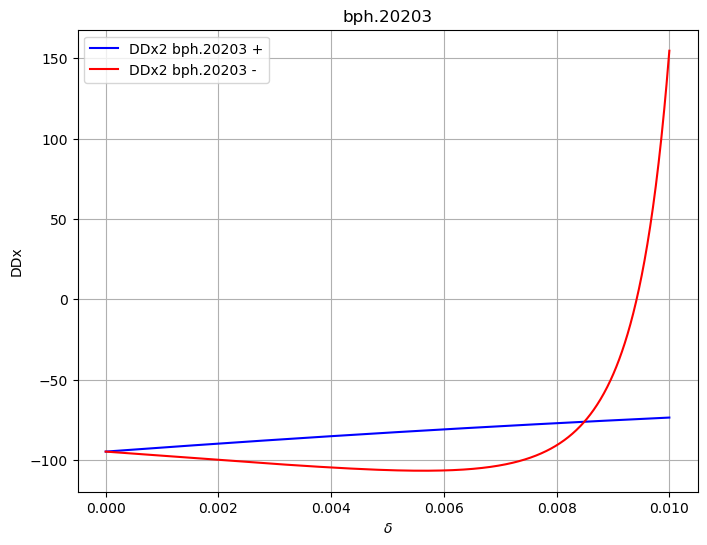

In [17]:
fig, ax = plt.subplots(1,1, figsize=(8,6))

bpm = 'bph.20203'
Dx4d_pos = np.array([twisses_4d_pos[i].rows[bpm].dx[0] for i in range(len(delta_sampling))])
Dx4d_neg = np.array([twisses_4d_neg[i].rows[bpm].dx[0] for i in range(len(delta_sampling))])
DDx4d_pos = np.array([twisses_4d_pos[i].rows[bpm].ddx[0] for i in range(len(delta_sampling))])
DDx4d_neg = np.array([twisses_4d_neg[i].rows[bpm].ddx[0] for i in range(len(delta_sampling))])

# ax.plot(delta_sampling, Dx4d_pos, label=f'Dx {bpm} +', color='blue')
# ax.plot(delta_sampling, Dx4d_neg, label=f'Dx {bpm} -', color='red')
ax.plot(delta_sampling, DDx4d_pos, label=f'DDx2 {bpm} +', color='blue')
ax.plot(delta_sampling, DDx4d_neg, label=f'DDx2 {bpm} -', color='red')

ax.set_xlabel('$\\delta$')
ax.set_ylabel('DDx')
ax.set_title(f'{bpm}')
ax.legend()
ax.grid()

### For different chroma

In [14]:
line = xt.Line.from_json('../../injection_lines/sps_q20_inj.json')
tt = line.get_table()
tw = line.twiss()

env = line.env
cavity_elements, cavity_names = line.get_elements_of_type(xt.Cavity)

for name in cavity_names:
    line[name].frequency = 200e6
    line[name].lag = 180
line['acl.31735'].voltage = 0 #setting 800 cav to 0V
line['actcse.31632'].voltage = 3.0e6

Loading line from dict:   0%|          | 0/4037 [00:00<?, ?it/s]

Done loading line from dict.           


In [16]:
cstart = 0.4
cend = 1.0
chromas_norm = np.linspace(cstart, cend, int((cend - cstart)/0.1) + 1)
delta_sampling = np.linspace(0, 0.01, 1000)

twisses_4d_pos = {}
twisses_4d_neg = {}

for c in chromas_norm:
    print(f'Starting chroma {c:.2f}')
    dqx_calc = c*qx
    dqy_calc = c*qy
    opt = line.match(
        method='6d', # <- passed to twiss
        vary=[
            xt.VaryList(['kqf0', 'kqd0'], step=1e-8, tag='quad'),
            xt.VaryList(['qph_setvalue', 'qpv_setvalue'], step=1e-4, tag='sext'),
        ],
        targets = [
            xt.TargetSet(qx=qx, qy=qy, tol=1e-6, tag='tune'),
            xt.TargetSet(dqx=dqx_calc, dqy=dqy_calc, tol=1e-2, tag='chrom'),
        ])
    tw4d_pos = []
    tw4d_neg = []
    for i in range(len(delta_sampling)):
        if i % 100 == 0:
            print(f'Calculating twiss for chroma {c:.2f}, delta {i}/{len(delta_sampling)}')
        tw4d_pos.append(line.twiss(delta0=delta_sampling[i], method='4d'))
        tw4d_neg.append(line.twiss(delta0=-delta_sampling[i], method='4d'))
    twisses_4d_pos[c] = tw4d_pos
    twisses_4d_neg[c] = tw4d_neg
    print(f'Finished chroma {c:.2f}')
    print(' ')

Starting chroma 0.40
                                             
Optimize - start penalty: 39.9                              
Matching: model call n. 13 penalty = 8.6474e-06              
Optimize - end penalty:  8.64742e-06                            
Calculating twiss for chroma 0.40, delta 0/1000
Calculating twiss for chroma 0.40, delta 100/1000
Calculating twiss for chroma 0.40, delta 200/1000
Calculating twiss for chroma 0.40, delta 300/1000
Calculating twiss for chroma 0.40, delta 400/1000
Calculating twiss for chroma 0.40, delta 500/1000
Calculating twiss for chroma 0.40, delta 600/1000
Calculating twiss for chroma 0.40, delta 700/1000
Calculating twiss for chroma 0.40, delta 800/1000
Calculating twiss for chroma 0.40, delta 900/1000
Finished chroma 0.40
 
Starting chroma 0.52
                                             
Optimize - start penalty: 3.42                              
Matching: model call n. 7 penalty = 1.8223e-03              
Optimize - end penalty:  0.00182226

ClosedOrbitSearchError: 

# With errors

In [18]:
line = xt.Line.from_json('../../injection_lines/sps_q20_inj.json')
tt = line.get_table()
env = line.env
cavity_elements, cavity_names = line.get_elements_of_type(xt.Cavity)

for name in cavity_names:
    line[name].frequency = 200e6
    line[name].lag = 180
line['acl.31735'].voltage = 0 #setting 800 cav to 0V
line['actcse.31632'].voltage = 3.0e6
tw = line.twiss()

Loading line from dict:   0%|          | 0/4037 [00:00<?, ?it/s]

Done loading line from dict.           


In [20]:
tte = env.elements.get_table()
mask_rbends = tte.element_type == 'RBend'
mask_quads = tte.element_type == 'Quadrupole'
mask_sextupoles = tte.element_type == 'Sextupole'

mba = tte.rows[mask_rbends].rows['mba.*'].name
mbb = tte.rows[mask_rbends].rows['mbb.*'].name
qf = tte.rows[mask_quads].rows['qf.*'].name
qd = tte.rows[mask_quads].rows['qd.*'].name
lsf = tte.rows[mask_sextupoles].rows['lsf.*'].name
lsd = tte.rows[mask_sextupoles].rows['lsd.*'].name

env.vars['qph_setvalue'] = 0.0
env.vars['qpv_setvalue'] = 0.0

# Set the strengths according to Hannes' measurements
for nn in mba:
    env[nn].knl = np.array([0., 0., 2.12e-3, 0., -5.74, 0.])

for nn in mbb:
    env[nn].knl = np.array([0., 0., -3.19e-3, 0., -5.10, 0.])

for nn in qf:
    env[nn].knl = np.array([0., 0., 0., 0.75e-1, 0., -0.87e3])

for nn in qd:
    env[nn].knl = np.array([0., 0., 0., -2.03e-1, 0., 2.04e3])


qx = 20.13
qy = 20.18
chroma_norm = 0.5

dqx_calc = chroma_norm*qx
dqy_calc = chroma_norm*qy

env.vars['qph_setvalue'] = chroma_norm
env.vars['qpv_setvalue'] = chroma_norm
opt = line.match(
    method='6d', # <- passed to twiss
    vary=[
        xt.VaryList(['kqf0', 'kqd0'], step=1e-8, tag='quad'),
        xt.VaryList(['qph_setvalue', 'qpv_setvalue'], step=1e-4, tag='sext'),
    ],
    targets = [
        xt.TargetSet(qx=qx, qy=qy, tol=1e-6, tag='tune'),
        xt.TargetSet(dqx=chroma_norm*qx, dqy=chroma_norm*qy, tol=1e-2, tag='chrom'),
    ])

                                             
Optimize - start penalty: 13.73                             
Matching: model call n. 13 penalty = 3.1098e-05              
Optimize - end penalty:  3.10977e-05                            


In [21]:
tw = line.twiss()

In [32]:
twisses_4d_pos_errs = []
twisses_4d_neg_errs = []

# for i in range(len(delta_sampling)):
for i in range(388):
    if i % 100 == 0:
        print(f'Calculating twiss for delta {i}/{len(delta_sampling)}')
    twisses_4d_pos_errs.append(line.twiss(delta0=delta_sampling[i], method='4d'))
    twisses_4d_neg_errs.append(line.twiss(delta0=-delta_sampling[i], method='4d'))

Calculating twiss for delta 0/1000
Calculating twiss for delta 100/1000
Calculating twiss for delta 200/1000
Calculating twiss for delta 300/1000


In [30]:
i

388

### bph.10208

In [41]:
bpm = 'bph.10208'

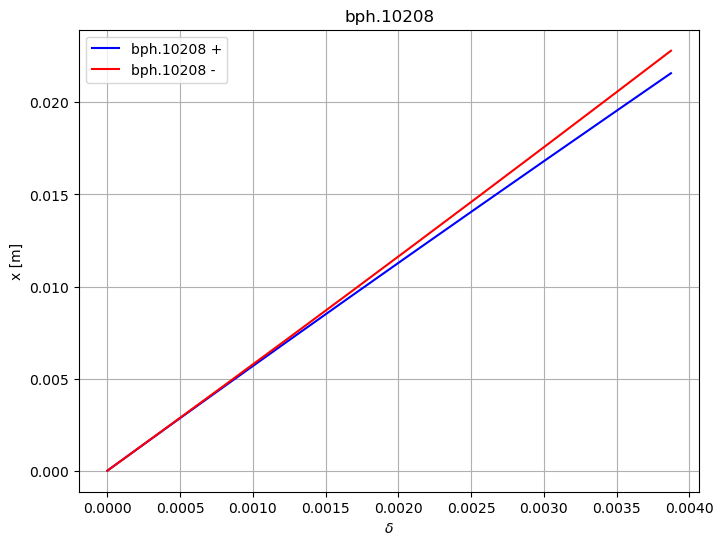

In [42]:
fig, ax = plt.subplots(1,1, figsize=(8,6))
colormap = colormaps['viridis']
norm = plt.Normalize(vmin=0, vmax= len(delta_sampling))

x4d_pos = np.array([twisses_4d_pos_errs[i].rows[bpm].x[0] for i in range(388)])
x4d_neg = np.array([twisses_4d_neg_errs[i].rows[bpm].x[0] for i in range(388)])

ax.plot(delta_sampling[:388], x4d_pos, label=f'{bpm} +', color='blue')
ax.plot(delta_sampling[:388], -x4d_neg, label=f'{bpm} -', color='red')
ax.set_xlabel('$\\delta$')
ax.set_ylabel('x [m]')
ax.set_title(f'{bpm}')
ax.legend()
ax.grid()

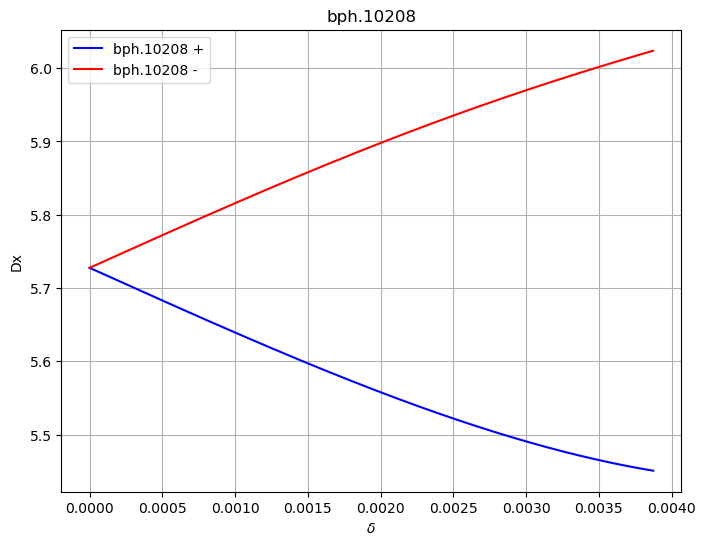

In [43]:
fig, ax = plt.subplots(1,1, figsize=(8,6))
colormap = colormaps['viridis']
norm = plt.Normalize(vmin=0, vmax= len(delta_sampling))

dx4d_pos = np.array([twisses_4d_pos_errs[i].rows[bpm].dx[0] for i in range(388)])
dx4d_neg = np.array([twisses_4d_neg_errs[i].rows[bpm].dx[0] for i in range(388)])

ax.plot(delta_sampling[:388], dx4d_pos, label=f'{bpm} +', color='blue')
ax.plot(delta_sampling[:388], dx4d_neg, label=f'{bpm} -', color='red')
ax.set_xlabel('$\\delta$')
ax.set_ylabel('Dx')
ax.set_title(f'{bpm}')
ax.legend()
ax.grid()

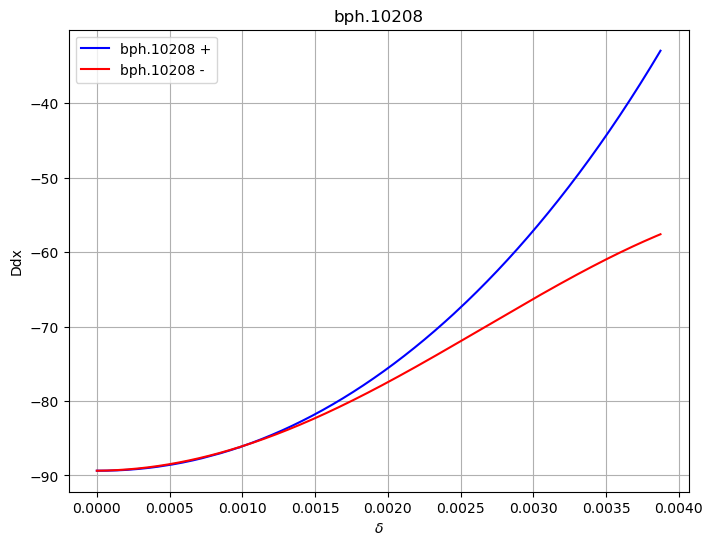

In [44]:
fig, ax = plt.subplots(1,1, figsize=(8,6))
colormap = colormaps['viridis']
norm = plt.Normalize(vmin=0, vmax= len(delta_sampling))

ddx4d_pos = np.array([twisses_4d_pos_errs[i].rows[bpm].ddx[0] for i in range(388)])
ddx4d_neg = np.array([twisses_4d_neg_errs[i].rows[bpm].ddx[0] for i in range(388)])

ax.plot(delta_sampling[:388], ddx4d_pos, label=f'{bpm} +', color='blue')
ax.plot(delta_sampling[:388], ddx4d_neg, label=f'{bpm} -', color='red')
ax.set_xlabel('$\\delta$')
ax.set_ylabel('Ddx')
ax.set_title(f'{bpm}')
ax.legend()
ax.grid()

### bph.13608

In [45]:
bpm = 'bph.13608'

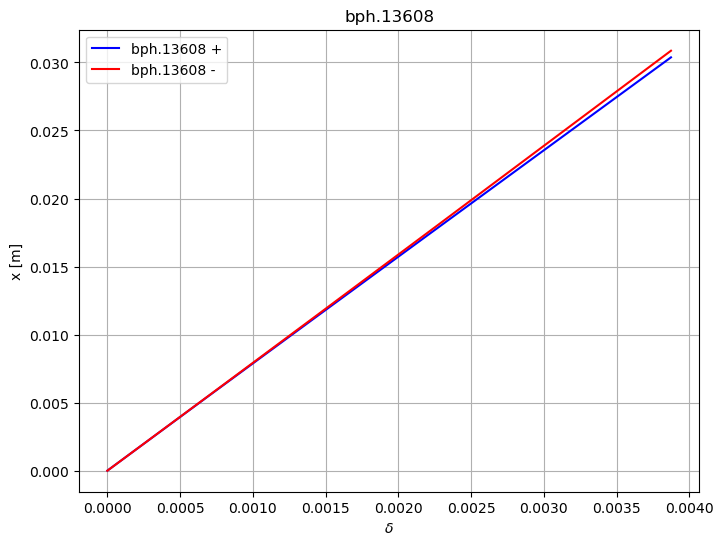

In [46]:
fig, ax = plt.subplots(1,1, figsize=(8,6))
colormap = colormaps['viridis']
norm = plt.Normalize(vmin=0, vmax= len(delta_sampling))

x4d_pos = np.array([twisses_4d_pos_errs[i].rows[bpm].x[0] for i in range(388)])
x4d_neg = np.array([twisses_4d_neg_errs[i].rows[bpm].x[0] for i in range(388)])

ax.plot(delta_sampling[:388], x4d_pos, label=f'{bpm} +', color='blue')
ax.plot(delta_sampling[:388], -x4d_neg, label=f'{bpm} -', color='red')
ax.set_xlabel('$\\delta$')
ax.set_ylabel('x [m]')
ax.set_title(f'{bpm}')
ax.legend()
ax.grid()

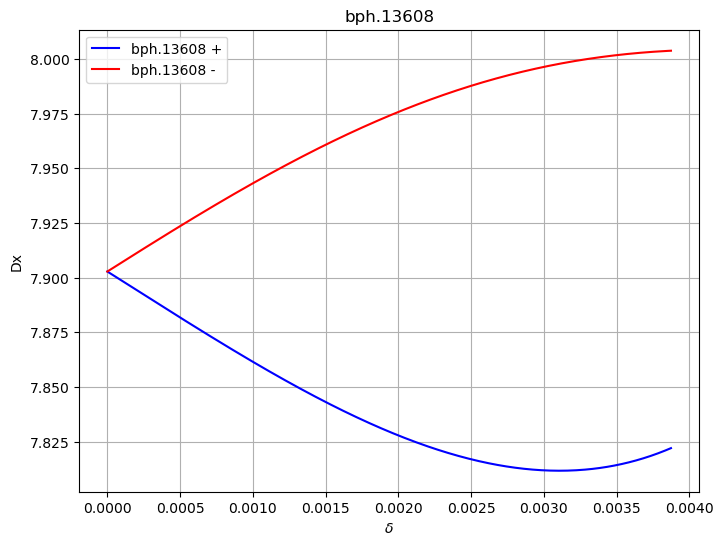

In [47]:
fig, ax = plt.subplots(1,1, figsize=(8,6))
colormap = colormaps['viridis']
norm = plt.Normalize(vmin=0, vmax= len(delta_sampling))

dx4d_pos = np.array([twisses_4d_pos_errs[i].rows[bpm].dx[0] for i in range(388)])
dx4d_neg = np.array([twisses_4d_neg_errs[i].rows[bpm].dx[0] for i in range(388)])

ax.plot(delta_sampling[:388], dx4d_pos, label=f'{bpm} +', color='blue')
ax.plot(delta_sampling[:388], dx4d_neg, label=f'{bpm} -', color='red')
ax.set_xlabel('$\\delta$')
ax.set_ylabel('Dx')
ax.set_title(f'{bpm}')
ax.legend()
ax.grid()

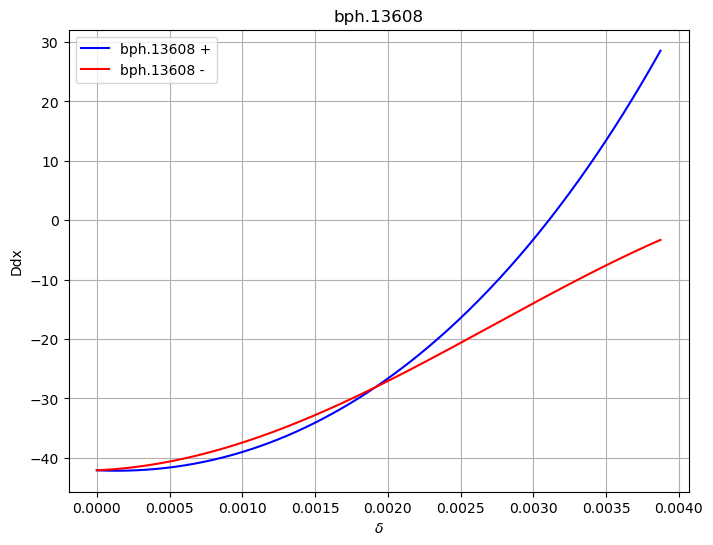

In [48]:
fig, ax = plt.subplots(1,1, figsize=(8,6))
colormap = colormaps['viridis']
norm = plt.Normalize(vmin=0, vmax= len(delta_sampling))

ddx4d_pos = np.array([twisses_4d_pos_errs[i].rows[bpm].ddx[0] for i in range(388)])
ddx4d_neg = np.array([twisses_4d_neg_errs[i].rows[bpm].ddx[0] for i in range(388)])

ax.plot(delta_sampling[:388], ddx4d_pos, label=f'{bpm} +', color='blue')
ax.plot(delta_sampling[:388], ddx4d_neg, label=f'{bpm} -', color='red')
ax.set_xlabel('$\\delta$')
ax.set_ylabel('Ddx')
ax.set_title(f'{bpm}')
ax.legend()
ax.grid()

### bph.20203

In [49]:
bpm = 'bph.20203'

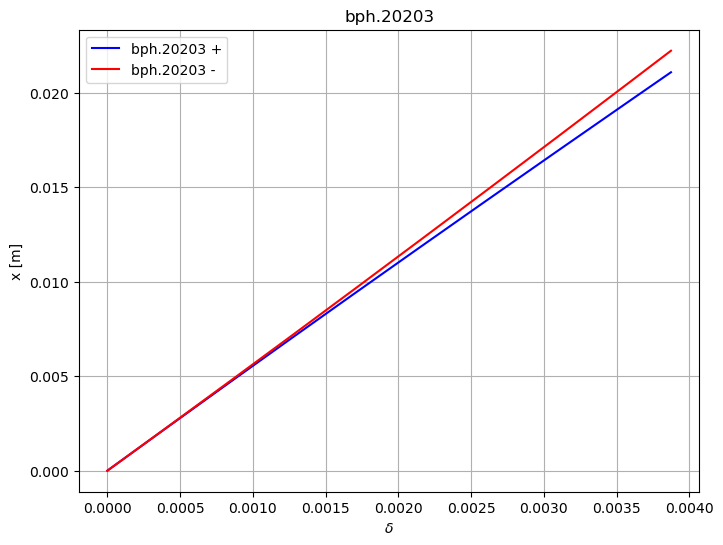

In [50]:
fig, ax = plt.subplots(1,1, figsize=(8,6))
colormap = colormaps['viridis']
norm = plt.Normalize(vmin=0, vmax= len(delta_sampling))

x4d_pos = np.array([twisses_4d_pos_errs[i].rows[bpm].x[0] for i in range(388)])
x4d_neg = np.array([twisses_4d_neg_errs[i].rows[bpm].x[0] for i in range(388)])

ax.plot(delta_sampling[:388], x4d_pos, label=f'{bpm} +', color='blue')
ax.plot(delta_sampling[:388], -x4d_neg, label=f'{bpm} -', color='red')
ax.set_xlabel('$\\delta$')
ax.set_ylabel('x [m]')
ax.set_title(f'{bpm}')
ax.legend()
ax.grid()

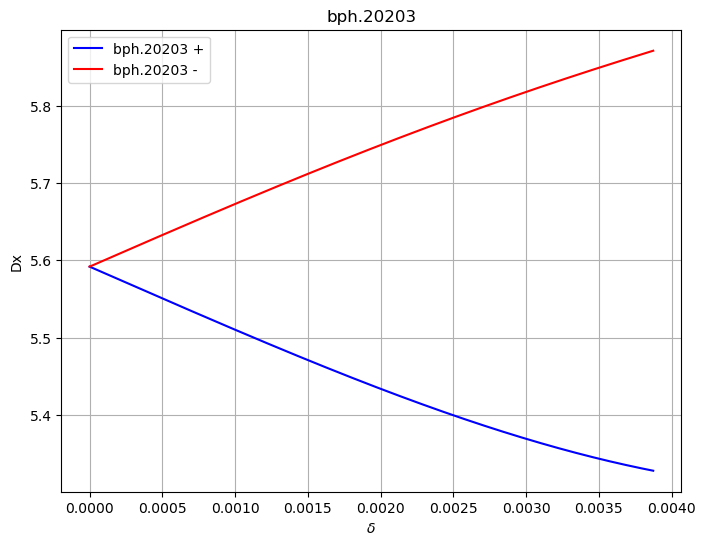

In [51]:
fig, ax = plt.subplots(1,1, figsize=(8,6))
colormap = colormaps['viridis']
norm = plt.Normalize(vmin=0, vmax= len(delta_sampling))

dx4d_pos = np.array([twisses_4d_pos_errs[i].rows[bpm].dx[0] for i in range(388)])
dx4d_neg = np.array([twisses_4d_neg_errs[i].rows[bpm].dx[0] for i in range(388)])

ax.plot(delta_sampling[:388], dx4d_pos, label=f'{bpm} +', color='blue')
ax.plot(delta_sampling[:388], dx4d_neg, label=f'{bpm} -', color='red')
ax.set_xlabel('$\\delta$')
ax.set_ylabel('Dx')
ax.set_title(f'{bpm}')
ax.legend()
ax.grid()

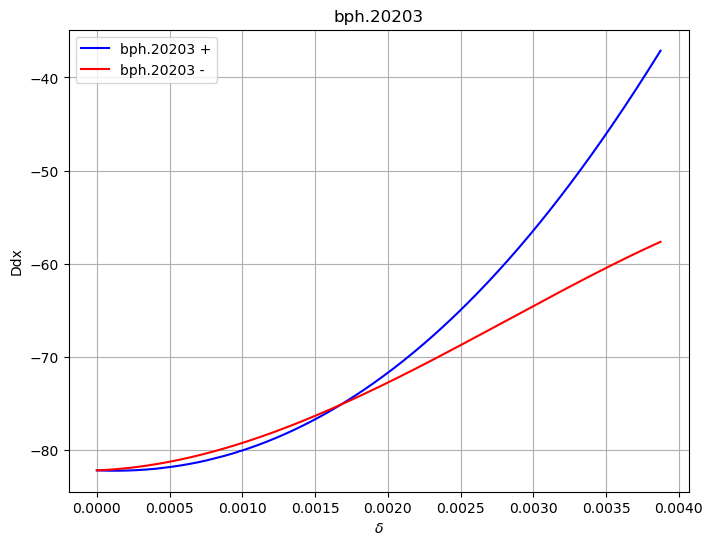

In [52]:
fig, ax = plt.subplots(1,1, figsize=(8,6))
colormap = colormaps['viridis']
norm = plt.Normalize(vmin=0, vmax= len(delta_sampling))

ddx4d_pos = np.array([twisses_4d_pos_errs[i].rows[bpm].ddx[0] for i in range(388)])
ddx4d_neg = np.array([twisses_4d_neg_errs[i].rows[bpm].ddx[0] for i in range(388)])

ax.plot(delta_sampling[:388], ddx4d_pos, label=f'{bpm} +', color='blue')
ax.plot(delta_sampling[:388], ddx4d_neg, label=f'{bpm} -', color='red')
ax.set_xlabel('$\\delta$')
ax.set_ylabel('Ddx')
ax.set_title(f'{bpm}')
ax.legend()
ax.grid()

# Combined plots

### bph.10208

In [76]:
bpm = 'bph.10208'

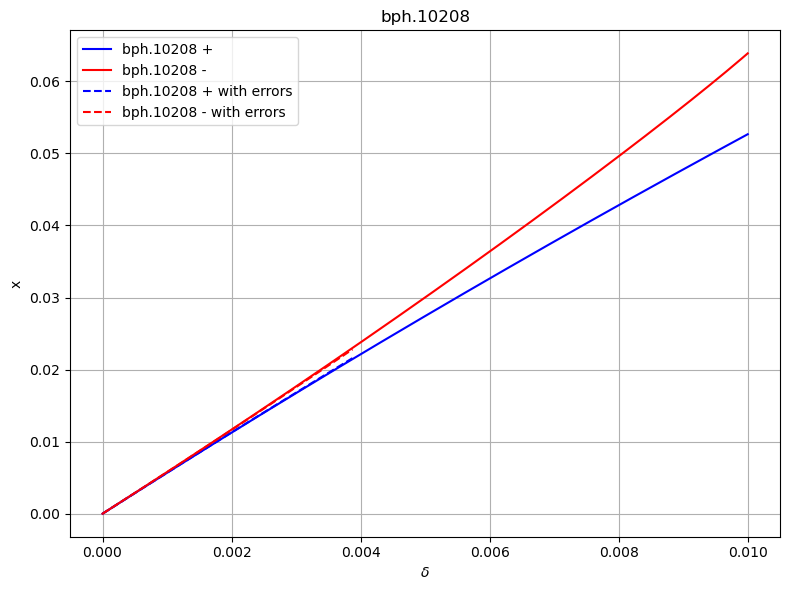

In [77]:
fig, ax = plt.subplots(1,1, figsize=(8,6))

x4d_pos = np.array([twisses_4d_pos[i].rows[bpm].x[0] for i in range(len(delta_sampling))])
x4d_neg = np.array([twisses_4d_neg[i].rows[bpm].x[0] for i in range(len(delta_sampling))])
x4d_pos_errs = np.array([twisses_4d_pos_errs[i].rows[bpm].x[0] for i in range(388)])
x4d_neg_errs = np.array([twisses_4d_neg_errs[i].rows[bpm].x[0] for i in range(388)])

ax.plot(delta_sampling, x4d_pos, label=f'{bpm} +', color='blue', ls = '-')
ax.plot(delta_sampling, -x4d_neg, label=f'{bpm} -', color='red', ls = '-')
ax.plot(delta_sampling[:388], x4d_pos_errs, label=f'{bpm} + with errors', color='blue', ls = '--')
ax.plot(delta_sampling[:388], -x4d_neg_errs, label=f'{bpm} - with errors', color='red', ls = '--')
ax.set_xlabel('$\\delta$')
ax.set_ylabel('x')
ax.set_title(f'{bpm}')
ax.legend()
ax.grid()
fig.tight_layout()
plt.savefig(f'Figures/{bpm}_x.png', dpi=300)

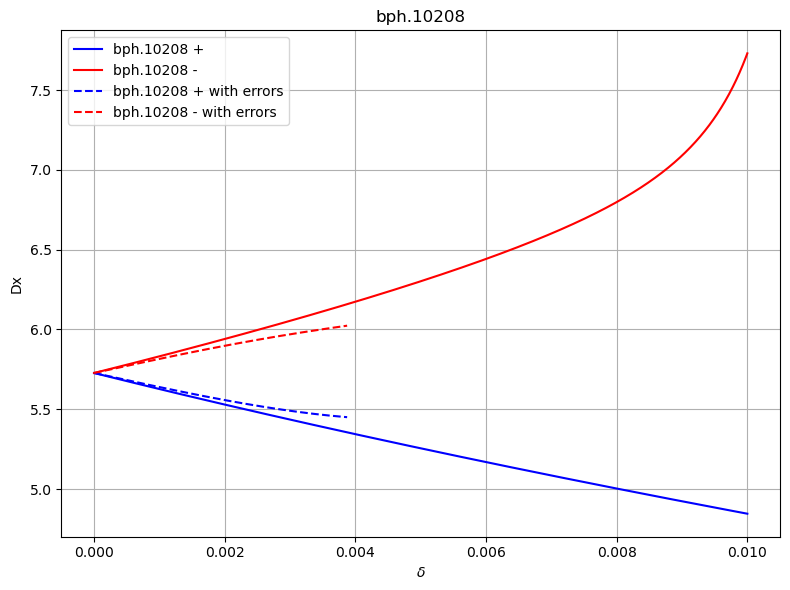

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(8,6))

dx4d_pos = np.array([twisses_4d_pos[i].rows[bpm].dx[0] for i in range(len(delta_sampling))])
dx4d_neg = np.array([twisses_4d_neg[i].rows[bpm].dx[0] for i in range(len(delta_sampling))])
dx4d_pos_errs = np.array([twisses_4d_pos_errs[i].rows[bpm].dx[0] for i in range(388)])
dx4d_neg_errs = np.array([twisses_4d_neg_errs[i].rows[bpm].dx[0] for i in range(388)])

ax.plot(delta_sampling, dx4d_pos, label=f'{bpm} +', color='blue', ls = '-')
ax.plot(delta_sampling, dx4d_neg, label=f'{bpm} -', color='red', ls = '-')
ax.plot(delta_sampling[:388], dx4d_pos_errs, label=f'{bpm} + with errors', color='blue', ls = '--')
ax.plot(delta_sampling[:388], dx4d_neg_errs, label=f'{bpm} - with errors', color='red', ls = '--')
ax.set_xlabel('$\\delta$')
ax.set_ylabel('Dx')
ax.set_title(f'{bpm}')
ax.legend()
ax.grid()
fig.tight_layout()
plt.savefig(f'Figures/{bpm}_Dx.png', dpi=300)

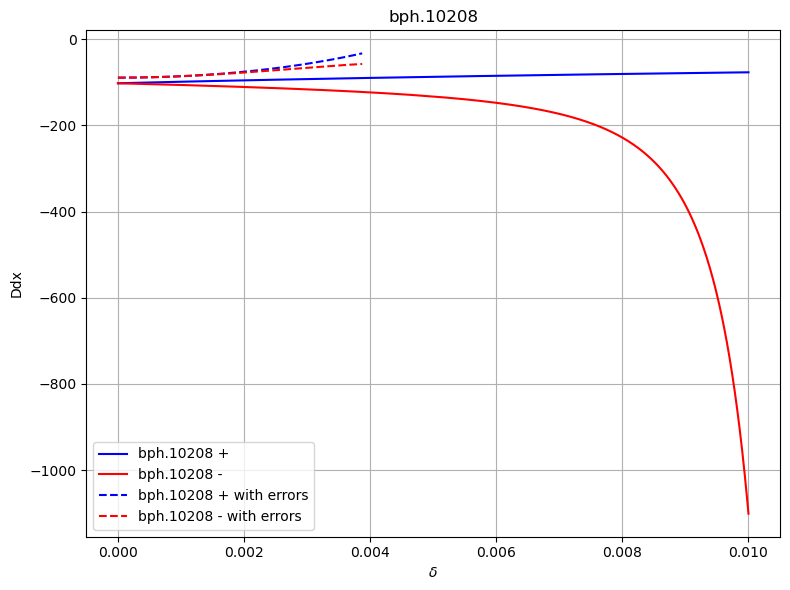

In [79]:
fig, ax = plt.subplots(1,1, figsize=(8,6))

ddx4d_pos = np.array([twisses_4d_pos[i].rows[bpm].ddx[0] for i in range(len(delta_sampling))])
ddx4d_neg = np.array([twisses_4d_neg[i].rows[bpm].ddx[0] for i in range(len(delta_sampling))])
ddx4d_pos_errs = np.array([twisses_4d_pos_errs[i].rows[bpm].ddx[0] for i in range(388)])
ddx4d_neg_errs = np.array([twisses_4d_neg_errs[i].rows[bpm].ddx[0] for i in range(388)])

ax.plot(delta_sampling, ddx4d_pos, label=f'{bpm} +', color='blue', ls = '-')
ax.plot(delta_sampling, ddx4d_neg, label=f'{bpm} -', color='red', ls = '-')
ax.plot(delta_sampling[:388], ddx4d_pos_errs, label=f'{bpm} + with errors', color='blue', ls = '--')
ax.plot(delta_sampling[:388], ddx4d_neg_errs, label=f'{bpm} - with errors', color='red', ls = '--')
ax.set_xlabel('$\\delta$')
ax.set_ylabel('Ddx')
ax.set_title(f'{bpm}')
ax.legend()
ax.grid()
fig.tight_layout()
plt.savefig(f'Figures/{bpm}_Ddx.png', dpi=300)

### bph.13608

In [80]:
bpm = 'bph.13608'

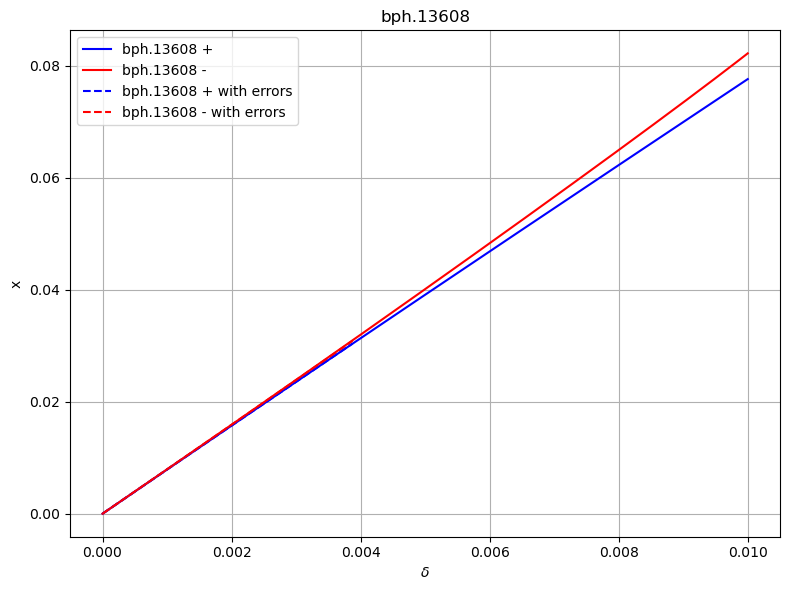

In [81]:
fig, ax = plt.subplots(1,1, figsize=(8,6))

x4d_pos = np.array([twisses_4d_pos[i].rows[bpm].x[0] for i in range(len(delta_sampling))])
x4d_neg = np.array([twisses_4d_neg[i].rows[bpm].x[0] for i in range(len(delta_sampling))])
x4d_pos_errs = np.array([twisses_4d_pos_errs[i].rows[bpm].x[0] for i in range(388)])
x4d_neg_errs = np.array([twisses_4d_neg_errs[i].rows[bpm].x[0] for i in range(388)])

ax.plot(delta_sampling, x4d_pos, label=f'{bpm} +', color='blue', ls = '-')
ax.plot(delta_sampling, -x4d_neg, label=f'{bpm} -', color='red', ls = '-')
ax.plot(delta_sampling[:388], x4d_pos_errs, label=f'{bpm} + with errors', color='blue', ls = '--')
ax.plot(delta_sampling[:388], -x4d_neg_errs, label=f'{bpm} - with errors', color='red', ls = '--')
ax.set_xlabel('$\\delta$')
ax.set_ylabel('x')
ax.set_title(f'{bpm}')
ax.legend()
ax.grid()
fig.tight_layout()
plt.savefig(f'Figures/{bpm}_x.png', dpi=300)

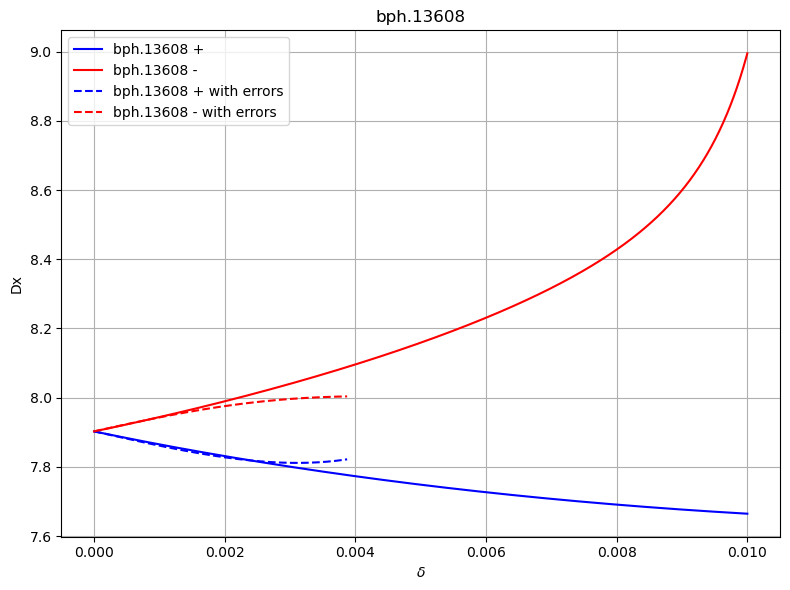

In [82]:
fig, ax = plt.subplots(1,1, figsize=(8,6))

dx4d_pos = np.array([twisses_4d_pos[i].rows[bpm].dx[0] for i in range(len(delta_sampling))])
dx4d_neg = np.array([twisses_4d_neg[i].rows[bpm].dx[0] for i in range(len(delta_sampling))])
dx4d_pos_errs = np.array([twisses_4d_pos_errs[i].rows[bpm].dx[0] for i in range(388)])
dx4d_neg_errs = np.array([twisses_4d_neg_errs[i].rows[bpm].dx[0] for i in range(388)])

ax.plot(delta_sampling, dx4d_pos, label=f'{bpm} +', color='blue', ls = '-')
ax.plot(delta_sampling, dx4d_neg, label=f'{bpm} -', color='red', ls = '-')
ax.plot(delta_sampling[:388], dx4d_pos_errs, label=f'{bpm} + with errors', color='blue', ls = '--')
ax.plot(delta_sampling[:388], dx4d_neg_errs, label=f'{bpm} - with errors', color='red', ls = '--')
ax.set_xlabel('$\\delta$')
ax.set_ylabel('Dx')
ax.set_title(f'{bpm}')
ax.legend()
ax.grid()
fig.tight_layout()
plt.savefig(f'Figures/{bpm}_Dx.png', dpi=300)

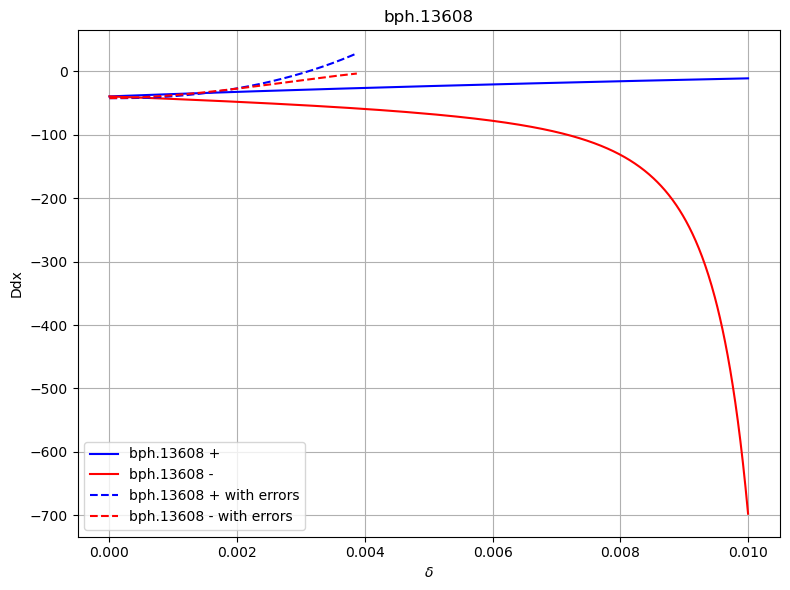

In [83]:
fig, ax = plt.subplots(1,1, figsize=(8,6))

ddx4d_pos = np.array([twisses_4d_pos[i].rows[bpm].ddx[0] for i in range(len(delta_sampling))])
ddx4d_neg = np.array([twisses_4d_neg[i].rows[bpm].ddx[0] for i in range(len(delta_sampling))])
ddx4d_pos_errs = np.array([twisses_4d_pos_errs[i].rows[bpm].ddx[0] for i in range(388)])
ddx4d_neg_errs = np.array([twisses_4d_neg_errs[i].rows[bpm].ddx[0] for i in range(388)])

ax.plot(delta_sampling, ddx4d_pos, label=f'{bpm} +', color='blue', ls = '-')
ax.plot(delta_sampling, ddx4d_neg, label=f'{bpm} -', color='red', ls = '-')
ax.plot(delta_sampling[:388], ddx4d_pos_errs, label=f'{bpm} + with errors', color='blue', ls = '--')
ax.plot(delta_sampling[:388], ddx4d_neg_errs, label=f'{bpm} - with errors', color='red', ls = '--')
ax.set_xlabel('$\\delta$')
ax.set_ylabel('Ddx')
ax.set_title(f'{bpm}')
ax.legend()
ax.grid()
fig.tight_layout()
plt.savefig(f'Figures/{bpm}_Ddx.png', dpi=300)

### bph.20203

In [84]:
bpm = 'bph.20203'

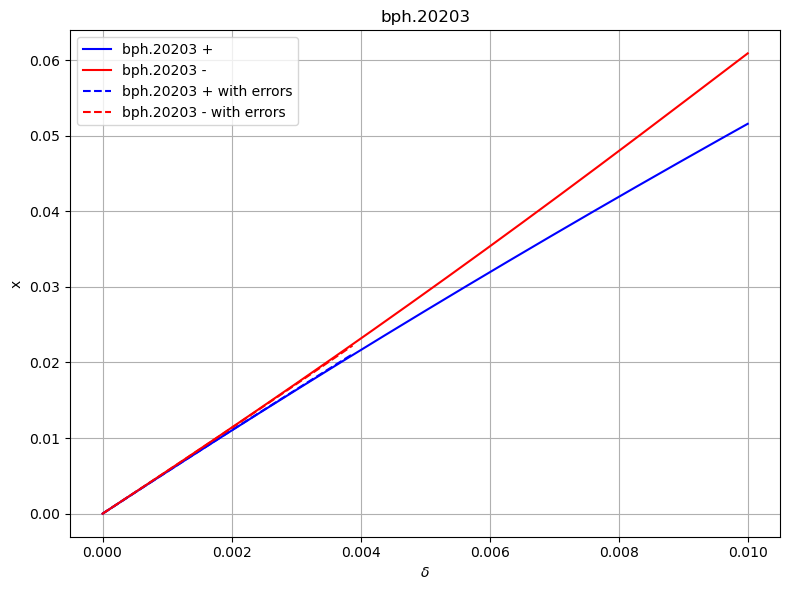

In [85]:
fig, ax = plt.subplots(1,1, figsize=(8,6))

x4d_pos = np.array([twisses_4d_pos[i].rows[bpm].x[0] for i in range(len(delta_sampling))])
x4d_neg = np.array([twisses_4d_neg[i].rows[bpm].x[0] for i in range(len(delta_sampling))])
x4d_pos_errs = np.array([twisses_4d_pos_errs[i].rows[bpm].x[0] for i in range(388)])
x4d_neg_errs = np.array([twisses_4d_neg_errs[i].rows[bpm].x[0] for i in range(388)])

ax.plot(delta_sampling, x4d_pos, label=f'{bpm} +', color='blue', ls = '-')
ax.plot(delta_sampling, -x4d_neg, label=f'{bpm} -', color='red', ls = '-')
ax.plot(delta_sampling[:388], x4d_pos_errs, label=f'{bpm} + with errors', color='blue', ls = '--')
ax.plot(delta_sampling[:388], -x4d_neg_errs, label=f'{bpm} - with errors', color='red', ls = '--')
ax.set_xlabel('$\\delta$')
ax.set_ylabel('x')
ax.set_title(f'{bpm}')
ax.legend()
ax.grid()
fig.tight_layout()
plt.savefig(f'Figures/{bpm}_x.png', dpi=300)

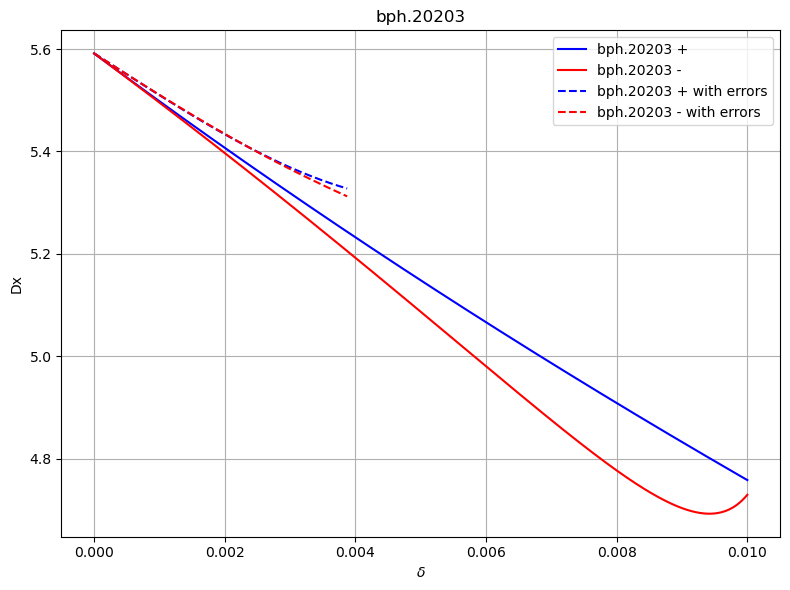

In [95]:
fig, ax = plt.subplots(1,1, figsize=(8,6))

dx4d_pos = np.array([twisses_4d_pos[i].rows[bpm].dx[0] for i in range(len(delta_sampling))])
dx4d_neg = np.array([twisses_4d_neg[i].rows[bpm].dx[0] for i in range(len(delta_sampling))])
dx4d_pos_errs = np.array([twisses_4d_pos_errs[i].rows[bpm].dx[0] for i in range(388)])
dx4d_neg_errs = np.array([twisses_4d_neg_errs[i].rows[bpm].dx[0] for i in range(388)])

ax.plot(delta_sampling, dx4d_pos, label=f'{bpm} +', color='blue', ls = '-')
ax.plot(delta_sampling, -dx4d_neg + dx4d_neg[0] + dx4d_pos[0], label=f'{bpm} -', color='red', ls = '-')
ax.plot(delta_sampling[:388], dx4d_pos_errs, label=f'{bpm} + with errors', color='blue', ls = '--')
ax.plot(delta_sampling[:388], -dx4d_neg_errs + dx4d_neg_errs[0] + dx4d_pos_errs[0], label=f'{bpm} - with errors', color='red', ls = '--')
ax.set_xlabel('$\\delta$')
ax.set_ylabel('Dx')
ax.set_title(f'{bpm}')
ax.legend()
ax.grid()
fig.tight_layout()
plt.savefig(f'Figures/{bpm}_Dx.png', dpi=300)

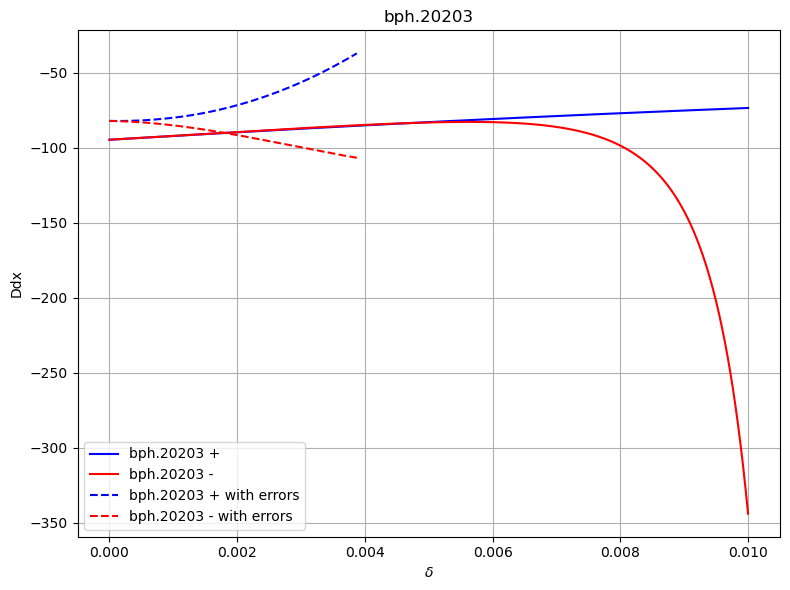

In [101]:
fig, ax = plt.subplots(1,1, figsize=(8,6))

ddx4d_pos = np.array([twisses_4d_pos[i].rows[bpm].ddx[0] for i in range(len(delta_sampling))])
ddx4d_neg = np.array([twisses_4d_neg[i].rows[bpm].ddx[0] for i in range(len(delta_sampling))])
ddx4d_pos_errs = np.array([twisses_4d_pos_errs[i].rows[bpm].ddx[0] for i in range(388)])
ddx4d_neg_errs = np.array([twisses_4d_neg_errs[i].rows[bpm].ddx[0] for i in range(388)])

ax.plot(delta_sampling, ddx4d_pos, label=f'{bpm} +', color='blue', ls = '-')
ax.plot(delta_sampling, -ddx4d_neg + ddx4d_neg[0] + ddx4d_pos[0], label=f'{bpm} -', color='red', ls = '-')
ax.plot(delta_sampling[:388], ddx4d_pos_errs, label=f'{bpm} + with errors', color='blue', ls = '--')
ax.plot(delta_sampling[:388], -ddx4d_neg_errs +ddx4d_neg_errs[0] + ddx4d_pos_errs[0], label=f'{bpm} - with errors', color='red', ls = '--')
ax.set_xlabel('$\\delta$')
ax.set_ylabel('Ddx')
ax.set_title(f'{bpm}')
ax.legend()
ax.grid()
fig.tight_layout()
plt.savefig(f'Figures/{bpm}_Ddx.png', dpi=300)

In [97]:
twisses_4d_pos_errs[-1].particle_on_co

Particles(q0=1, mass0=9.38e+08, p0c=[2.592e+10], gamma0=[27.64334239], beta0=[0.99934547], s=[0.], zeta=[3.76604903e-29], x=[0.03060369], y=[-5.8739041e-23], px=[0.00053554], py=[6.51857393e-23], ptau=[0.00387135], delta=[0.00387387], rpp=[0.99614108], rvv=[1.00000504], chi=[1.], charge_ratio=[1.], weight=[1.], ax=[0.], ay=[0.], spin_x=[0.], spin_y=[0.], spin_z=[0.], anomalous_magnetic_moment=[0.], pdg_id=[0], particle_id=[0], at_element=[0], at_turn=[0], state=[1], parent_particle_id=[0], start_tracking_at_element=np.int64(-1), t_sim=2.31e-05)

In [98]:
line.twiss4d(delta0=delta_sampling[388], co_guess=twisses_4d_pos_errs[-1].particle_on_co)

TwissTable: 3849 rows, 70 cols
name                   s             x            px             y            py          zeta ...
begi.10010             0     0.0306826     0.0005369  -2.74069e-25   2.05414e-25   3.75874e-29
qf.10010               0     0.0306826     0.0005369  -2.74069e-25   2.05414e-25   3.75874e-29
drift_1            3.085     0.0306335  -0.000568583   3.53612e-25   2.06822e-25   1.54321e-05
mba.10030        3.44501     0.0304296  -0.000568583   4.27782e-25   2.06822e-25   1.71935e-05
drift_2          9.70503     0.0269839  -0.000536486   1.71762e-24    2.0685e-25  -0.000194414
mba.10050         10.105     0.0267701  -0.000536486   1.80004e-24    2.0685e-25   -0.00019245
drift_3          16.3651     0.0235251  -0.000504253   3.09016e-24   2.06915e-25  -0.000373892
mbb.10070        16.7551     0.0233292  -0.000504253   3.17055e-24   2.06915e-25   -0.00037197
drift_4          23.0151     0.0202896  -0.000470641   4.45985e-24   2.06573e-25  -0.000525111
mbb.10090      

iteratief verder gaan om te twissen voor delta

twisses uitbreiden (en juiste mirror) + sweep om te zien waar ik verlies met en zonder errors 

X, dx, ddx vergelijken op de loss locations

beta in functie van delta